## Machine Learning for Cities Homework
### Assignment 1

This homework assignment concerns NYPD police stops in New York City in the years
20112012
where the suspected crime was CPW (criminal possession of a weapon). You can
read more about these stops at  
https://en.wikipedia.org/wiki/Terry_stop  
https://en.wikipedia.org/wiki/Stopandfrisk_  
in_New_York_City  
Python’s scikitlearn package has a module called sklearn.cluster
(http://scikitlearn.org/stable/modules/classes.html#modulesklearn.cluster) and documentation (http://scikitlearn.org/stable/modules/clustering.html#clustering) that should get you started.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as cl
%matplotlib inline

## Problem 1
You are given 1,069 stop records in the file ‘original_with_duplicates_noid.csv’, but
unfortunately technical errors have resulted in some exact duplicate records. You know
there are around 1,000 unique stops in the file (there may be slightly more or slightly
fewer).  
a) Use a clustering technique of your choice to determine how many unique records there are.    
b) Check your work by looking for rowwise duplicates using any technique of your choice (this should be straightforward). How well did your clustering technique perform?  
__c) Write a paragraph explaining what you did in parts a) and b)__

__a)__

In [2]:
df1 = pd.read_csv('original_with_duplicates_noid.csv')
df1.head()

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2012,False,False,False,black,27,medium,male,5.666667,180,...,False,False,False,False,False,False,False,Saturday,January,6
1,2011,False,False,False,asian,40,medium,male,6.166667,225,...,False,False,True,True,False,False,False,Friday,November,6
2,2012,False,False,False,black,20,medium,male,6.000000,200,...,False,False,False,False,False,False,False,Saturday,August,6
3,2011,False,False,False,black,23,medium,male,5.916667,180,...,False,False,False,True,False,False,False,Friday,April,1
4,2011,False,False,False,black,33,thin,male,5.666667,175,...,False,False,False,False,False,False,False,Thursday,December,4


In [3]:
df1.dtypes

year                          int64
found.weapon                   bool
found.gun                      bool
arrested                       bool
suspect.race                 object
suspect.age                   int64
suspect.build                object
suspect.sex                  object
suspect.height              float64
suspect.weight                int64
stopped.bc.desc                bool
stopped.bc.violent             bool
stopped.bc.other               bool
stopped.bc.object              bool
stopped.bc.casing              bool
stopped.bc.lookout             bool
stopped.bc.drugs               bool
stopped.bc.clothing            bool
stopped.bc.furtive             bool
stopped.bc.bulge               bool
precinct                      int64
inside.outside                 bool
location.housing             object
observation.period            int64
officer.uniform                bool
additional.report              bool
additional.investigation       bool
additional.proximity        

In [4]:
from sklearn.preprocessing import scale
df1 = df1.select_dtypes(include=['float','int','object'])
df = scale(pd.get_dummies(df1))

In [5]:
dbs = cl.DBSCAN(min_samples=1).fit(df)
result = dbs.fit_predict(df)
print len(np.unique(result)), "unique records found by clustering"

997 unique records found by clustering


__b)__

In [6]:
print len(df1.drop_duplicates()), "unique records found by rowwise duplicates searching"

997 unique records found by rowwise duplicates searching


__c)__

For part __a)__, I filtered the data by selecting columns of data type float, integer or categorical values and convert them into dummy variables. After scaling them by scikit, I then conducted a DBScan Cluster on the filtered data. By setting the minimum sample to 1 (such that there exist 1 other samples), I found 997 unique records.

For part __b)__, I simply used dataframe.drop_duplicates() function powered by pandas to detect the unique records and I found 997 of them, which is consistent to the result in part __a)__.

* * *
## Problem 2
You are given 1,100 stop records in the file ‘original_with_errors_noid.csv’, but unfortunately technical errors have resulted in some almost duplicate records (that is, there are some records that are duplicates of others except for slight variations in two features). You know there are around 1,000 unique stops in the file (there may be slightly more or slightly fewer).  
a) Use a clustering technique of your choice to determine how many unique records you think there should be.  
b) Which are the two features where errors were introduced?  
__c) Write a paragraph explaining what you did in parts a) and b)__

__a)__

In [7]:
df2 = pd.read_csv('original_with_errors_noid.csv')
df2 = df2.select_dtypes(include=['float','int','object'])
df = scale(pd.get_dummies(df2))

In [8]:
result = dbs.fit_predict(df)
print len(np.unique(result)), "unique records found by clustering"

1024 unique records found by clustering


__b)__

In [12]:
for i in range(len(df2.columns)):
    df2b = df2.drop(df2.columns[i], 1)
    df = scale(pd.get_dummies(df2b))
    result = dbs.fit_predict(df)
    print "Without the %s feature:" % (i+1)
    print 1024 - len(np.unique(result)), "less unique records were found"

Without the 1 feature:
1 less unique records were found
Without the 2 feature:
0 less unique records were found
Without the 3 feature:
11 less unique records were found
Without the 4 feature:
0 less unique records were found
Without the 5 feature:
0 less unique records were found
Without the 6 feature:
1 less unique records were found
Without the 7 feature:
26 less unique records were found
Without the 8 feature:
1 less unique records were found
Without the 9 feature:
0 less unique records were found
Without the 10 feature:
0 less unique records were found
Without the 11 feature:
6 less unique records were found
Without the 12 feature:
8 less unique records were found
Without the 13 feature:
1 less unique records were found


In [13]:
df2.columns[2], df2.columns[6]

('suspect.age', 'suspect.weight')

Therefore, the two features where errors were introduced are suspect.age and suspect.weight since the result without these two features were much more different than the others.

__c)__

For part __a)__, I generally followed the same preprocessing procedure and used the same algorithm (as well as parameters) as I did in problem 1, it turned out it 1024 unique records were found. This was more than the result in problem 1 since errors were introduced.

For part __b)__, I dropped the feature one by one from the raw data and conducted clustering over those subsets through the exact same steps as I did in part __a)__. I then compared the clustering result with the one in part __a)__ and picked the 2 features that made the most differences from part __a)__.

* * *
## Problem 3
You are given records for all recorded CPW stops made in New York City during 2012 in the file ‘cpw_stops_2012.csv’. Each record includes the lat/long of the stop and the month, day, and time period (this feature has six values, where each corresponds to a fourhour time period. For example, time.period = 1 means the stop occurred between midnight and 4am, and time.period = 2 means the stop occurred between 4am and 8am). Explore “hotspots” of CPW stops by applying clustering methods based on space, or space and time. In particular,  
a) Apply at least two different clustering algorithms to the data  
b) Plot some clusters on a map of New York City  
__c) Write at least two paragraphs explaining which clustering methods you chose and the parameters you used (and why you used those parameters). Do your results make sense? [This question is deliberately openended. You will be evaluated on whether or not you made an effort to understand the data, successfully applied different clustering algorithms, and made at least one plot]__

__a)__

In [33]:
df3 = pd.read_csv('cpw_stops_2012.csv')
df3.head()

,day,month,time.period,lat,lon
0,Thursday,January,6,40.829234,-73.875506
1,Saturday,January,1,40.812185,-73.938034
2,Sunday,January,1,40.840865,-73.885549
3,Sunday,January,1,40.577244,-74.000032
4,Tuesday,January,5,40.834126,-73.916660


In [57]:
df = scale(pd.get_dummies(df3))

In [78]:
df3['pred_KMM'] = cl.KMeans(n_clusters=3).fit_predict(df)
df3['pred_Birch'] = cl.Birch(n_clusters=3).fit_predict(df)

__b)__

(-74.299999999999997,
 -73.599999999999994,
 40.400000000000006,
 41.000000000000007)

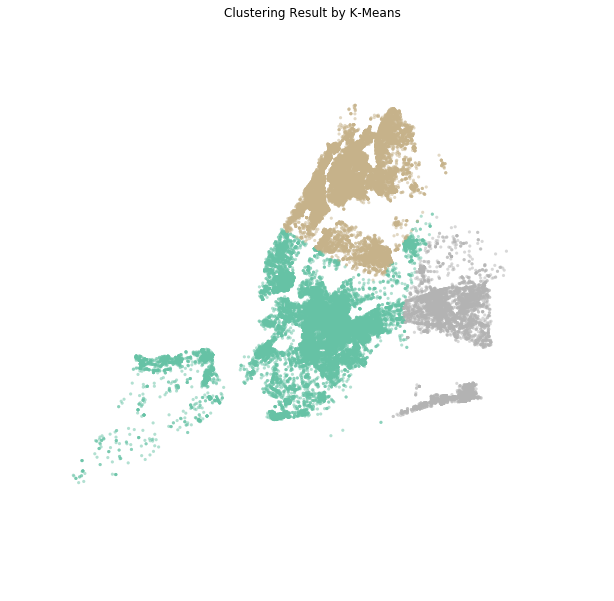

In [79]:
plt.subplots(figsize=(10,10))
plt.scatter(df3['lon'], df3['lat'], c=df3['pred_KMM'], s=10, alpha=.5, cmap='Set2', edgecolors='none')
plt.title('Clustering Result by K-Means')
plt.axis('off')

(-74.299999999999997,
 -73.599999999999994,
 40.400000000000006,
 41.000000000000007)

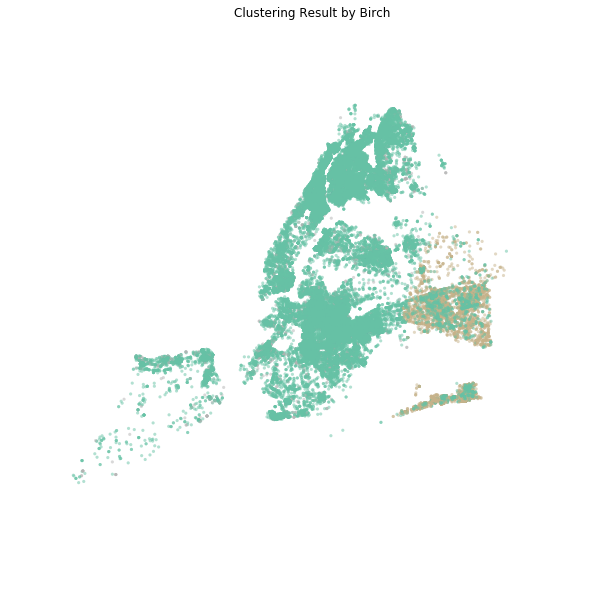

In [80]:
plt.subplots(figsize=(10,10))
plt.scatter(df3['lon'], df3['lat'], c=df3['pred_Birch'], s=10, alpha=.5, cmap='Set2', edgecolors='none')
plt.title('Clustering Result by Birch')
plt.axis('off')

__c)__

I chose to use both space and time features (a.k.a all features) to perform clustering because the result would just be simply a geographical division if I only use space features. For the methods, I chose K-Means and BIRCH due to their high computing efficiency. (BIRCH was especially good on particularly large data-sets) The second reason of choosing them was that they let me to specify an exact number of clusters, which made me easier to compare the result of them.  
For both clustering method, I specified 3 clusters and left others parameters as default. (I had tried for more clusters, but the map resulted was hardly readable and made no sense)  
Comparing the two maps, it seems that K-means clustering gave a clearer result while the map resulted from BIRCH was abigious. This was probably due to the reason that BIRCH performs hierarchical clustering. The Three clusters generated by K-means were not totally decided by the spatial features which can be seen at the area around Flushing and White Stone, but I could not really tell the reason behind this fact.